# Ford GoBike Data Exploration
## by Victoria Bloomingdale

## Investigation Overview

> I chose the Ford GoBike data set provided by the Udacity project page. I was most interested in finding who were the most frequent users, how long did trips last, and what were the bikes primarily used for.

## Dataset Overview

> The data set includes information for the month of February, 2019, about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The original dataset had 183412 entries and 16 columns. Most of the columns were either numeric or strings. After cleaning, 'start_time' and 'end_time' were converted to datetime type, columns with id's converted to strings, 'user_type' and 'member_gender' to categories, and 'member_birth_year' to int.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\vkin1\OneDrive\Desktop\201902-fordgobike-tripdata.csv')
df2 = df.copy()

# change time columns to datetime datatype
df2['start_time'] = pd.to_datetime(df2['start_time'])
df2['end_time'] = pd.to_datetime(df2['end_time'])

# change columns with id's to object type
df2['start_station_id'] = df2['start_station_id'].astype(object)
df2['end_station_id'] = df2['end_station_id'].astype(object)
df2['bike_id'] = df2['bike_id'].astype(object)

# to category type
df2['user_type'] = df2['user_type'].astype('category')
df2['member_gender'] = df2['member_gender'].astype('category')

# to integer type
df2['member_birth_year'] = df2['member_birth_year'].fillna(0).astype(int)


## User Types

> The data set included user types and gender. Subscribers far outnumbered casual users. When looking at genders, there were three times as many male users than female users.

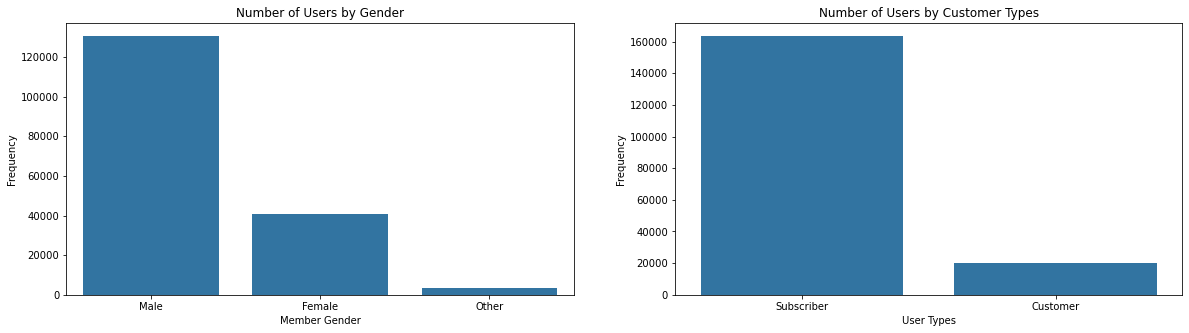

In [3]:
count = df2.user_type.value_counts()
user_order = count.index

counts = df2.member_gender.value_counts()
gender_order = counts.index

base_color = sb.color_palette()[0]

plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
sb.countplot(data = df2, x = 'member_gender', color = base_color, order = gender_order)
plt.xlabel('Member Gender')
plt.ylabel('Frequency')
plt.title('Number of Users by Gender')

plt.subplot(1,2,2)
sb.countplot(data = df2, x = 'user_type', color = base_color, order = user_order);
plt.xlabel('User Types')
plt.ylabel('Frequency')
plt.title('Number of Users by Customer Types');

## Trip Duration by Age and Gender

> Although the number of male users was far higher than the other groups, all three gender groups showed similar trip duration broken down by age. Longer trips were usually taken by those between 20- to 45-year-olds regardless of gender.

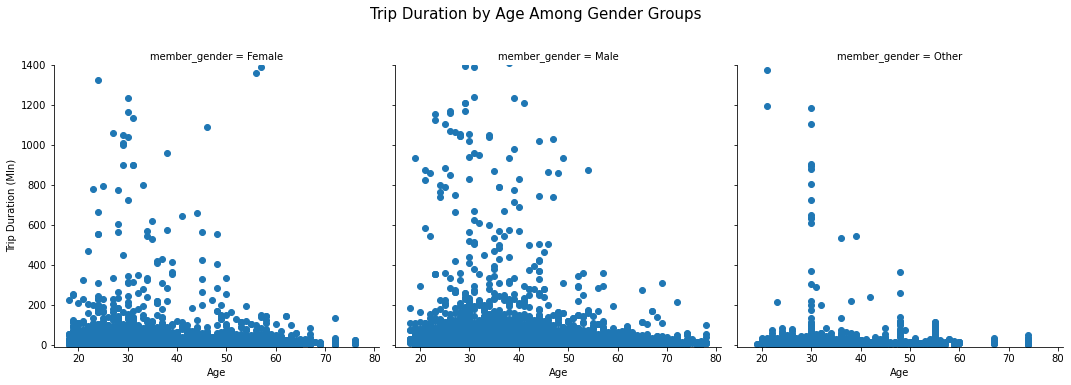

In [4]:
df2 = df2.loc[df2.member_birth_year >= 1940]
df2['age'] = 2019-df2['member_birth_year']
df2['duration_sec'] = df2['duration_sec'].astype(float)
df2['duration_min'] = df2['duration_sec']//60

g = sb.FacetGrid(data = df2, col = 'member_gender', col_wrap = 3, height = 5, ylim = [-10, 1400])
g.map(plt.scatter, 'age', 'duration_min')
g.set_axis_labels('Age', 'Trip Duration (MIn)')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Trip Duration by Age Among Gender Groups', y = 1.06, fontsize = 15)
plt.show()

## Average Trip Duration by User Type

>Higher number in user type did not mean longer trips either. The average trip duration was greater for customers than subsribers.

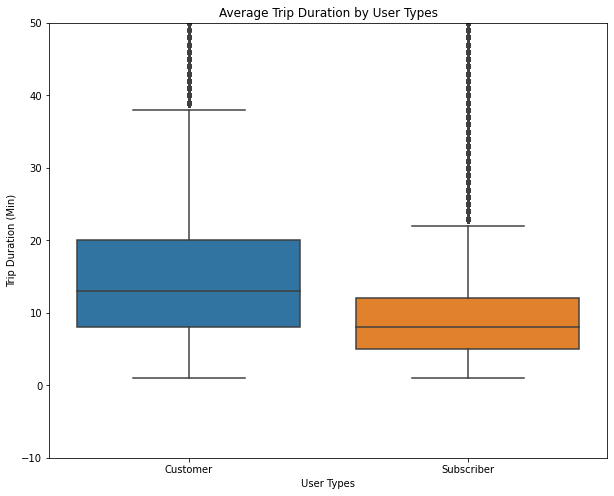

In [5]:
plt.figure(figsize = [10, 8])
sb.boxplot(data = df2, x = 'user_type', y = 'duration_min')
plt.ylim([-10, 50])
plt.xlabel('User Types')
plt.ylabel('Trip Duration (Min)')
plt.title('Average Trip Duration by User Types');

## Bike to Work

>When looking at what time and which days the bikes were used most frequently, the hours and days coincided with regular commute hours. This is a good indication that the bikes were used to quickly travel to and from work. 

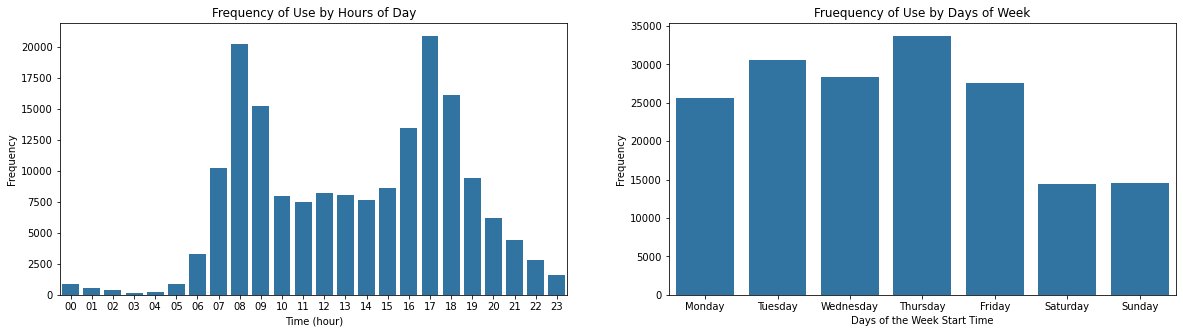

In [6]:
df2['start_hour'] = df2.start_time.dt.strftime('%H')
df2['start_week'] = df2.start_time.dt.strftime('%A')
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
sb.countplot(data = df2, x = 'start_hour', color = base_color, 
             order = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.xlabel('Time (hour)')
plt.ylabel('Frequency')
plt.title('Frequency of Use by Hours of Day')

plt.subplot(1,2,2)
sb.countplot(data = df2, x = 'start_week', color = base_color, 
             order = day_order)
plt.xlabel('Days of the Week Start Time')
plt.ylabel('Frequency')
plt.title('Fruequency of Use by Days of Week');

## Enjoy the Weekend

>When broken down by days of the week, male users and subscribers consistently took shorter trips than the other groups. However, all user groups took longer trips on the weekends than weekdays.

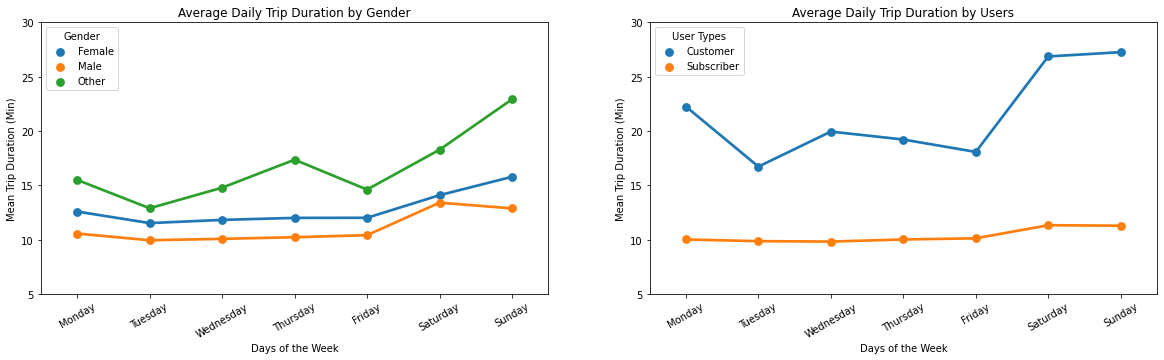

In [7]:
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
sb.pointplot(data = df2, x = 'start_week', y = 'duration_min', hue = 'member_gender', ci=None, order = day_order)
plt.title('Average Daily Trip Duration by Gender')
plt.xlabel('Days of the Week')
plt.ylabel('Mean Trip Duration (Min)')
plt.ylim(5, 30)
plt.xticks(rotation = 30)
plt.legend(title = 'Gender', loc='upper left')

plt.subplot(1,2,2)
sb.pointplot(data = df2, x = 'start_week', y = 'duration_min', hue = 'user_type', ci=None, order = day_order)
plt.title('Average Daily Trip Duration by Users')
plt.xlabel('Days of the Week')
plt.ylabel('Mean Trip Duration (Min)')
plt.ylim(5, 30)
plt.xticks(rotation = 30)
plt.legend(title = 'User Types')
plt.show()

## Conclusion

>It was interesting to see that higher user numbers did not translate to longer trips since the data seemed to indicate the bikes were used mostly for work commute. Once the work week was over, users tended to take longer trips.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert C:\Users\vkin1\OneDrive\Desktop\Ford_GoBike_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt 